In [1]:
# Quantum GOL 4 states
import numpy as np

class ComplexGameOfLife:
    def __init__(self, size=10):
        self.size = size
        self.grid = np.random.choice([-1, 1, -1j, 1j], size=(size, size))
    
    def get_neighborhood_sum(self, x, y):
        sum = 0
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue
                sum += self.grid[(x + dx) % self.size, (y + dy) % self.size]
        return sum

    def update_cell(self, x, y):
        neighborhood_sum = self.get_neighborhood_sum(x, y)
        current_state = self.grid[x, y]

        # Define the complex rules
        if current_state == -1:
            if neighborhood_sum.real > 0:
                return 1
            elif neighborhood_sum.imag > 0:
                return 1j
            return -1j
        elif current_state == 1:
            if neighborhood_sum.real < 0:
                return -1
            elif neighborhood_sum.imag < 0:
                return -1j
            return 1j
        elif current_state == -1j:
            if neighborhood_sum.real > 0:
                return 1
            elif neighborhood_sum.imag < 0:
                return -1
            return 1j
        else:  # current_state == 1j
            if neighborhood_sum.real < 0:
                return -1
            elif neighborhood_sum.imag > 0:
                return 1
            return -1j

    def update_grid(self):
        new_grid = np.copy(self.grid)
        for x in range(self.size):
            for y in range(self.size):
                new_grid[x, y] = self.update_cell(x, y)
        self.grid = new_grid

    def display_grid(self):
        display_map = {-1: '□', 1: '■', -1j: '○', 1j: '●'}
        for row in self.grid:
            print(' '.join(display_map[cell] for cell in row))

# Test the implementation
game = ComplexGameOfLife(size=10)
print("Initial Grid:")
game.display_grid()

print("\nGrid after one update:")
game.update_grid()
game.display_grid()


Initial Grid:
○ □ □ ○ ■ ○ □ ■ ○ □
○ ○ □ □ ● ○ □ ■ ● ■
■ ■ ■ □ ■ ■ □ ● ● ●
■ ○ ■ □ ○ ○ ○ ● ● ●
■ ■ ■ □ ○ ■ ○ ● ■ ●
■ ■ ● □ ■ ● ● ■ ○ ■
● ■ ● ● ● ■ ○ □ □ ■
□ ■ ○ □ □ ■ □ □ □ □
■ ■ □ □ ● ● □ ● ● □
■ ○ ○ ○ ○ ● ■ □ □ ●

Grid after one update:
□ ○ ○ □ □ ● ■ □ ● ■
■ □ ○ ○ ○ ● ■ □ ■ ●
○ ○ □ ○ □ □ ■ □ ■ ■
● ■ ○ ■ □ ■ ■ ■ ■ ■
● ● ● ■ □ ○ ■ ○ ● ■
● ● ■ ■ ● ○ ○ □ ■ ●
○ ● ■ □ ■ ● ● ○ ○ □
■ ● ● ● ● □ ● ● ● ●
● ○ ○ ○ □ □ ● □ □ ●
□ □ □ □ ● ○ □ ● ● □


In [2]:
# Modified 2 state GOL
import numpy as np
class ModifiedGameOfLife:
    def __init__(self, size=10):
        self.size = size
        self.grid = np.random.choice([-1, 1], size=(size, size))
    
    def get_neighborhood_product(self, x, y):
        product = 1
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue
                product *= self.grid[(x + dx) % self.size, (y + dy) % self.size]
        return product

    def update_cell(self, x, y):
        neighborhood_product = self.get_neighborhood_product(x, y)
        # Transition rule: flip the state if the product is -1
        return -1 if neighborhood_product == -1 else 1

    def update_grid(self):
        new_grid = np.copy(self.grid)
        for x in range(self.size):
            for y in range(self.size):
                new_grid[x, y] = self.update_cell(x, y)
        self.grid = new_grid

    def display_grid(self):
        display_map = {-1: '□', 1: '■'}
        for row in self.grid:
            print(' '.join(display_map[cell] for cell in row))

# Test the implementation
modified_game = ModifiedGameOfLife(size=10)
print("Initial Grid:")
modified_game.display_grid()

print("\nGrid after one update:")
modified_game.update_grid()
modified_game.display_grid()


Initial Grid:
■ □ ■ ■ □ ■ ■ ■ □ □
□ □ ■ ■ ■ ■ □ ■ ■ ■
■ □ □ □ ■ ■ □ ■ ■ □
□ □ ■ □ ■ ■ ■ □ □ □
□ ■ □ □ □ □ ■ □ ■ □
□ □ □ ■ □ □ □ ■ ■ ■
■ □ ■ ■ □ □ □ □ □ □
■ ■ □ ■ ■ □ ■ □ ■ ■
■ ■ □ □ □ ■ ■ □ ■ ■
■ ■ ■ □ □ ■ ■ ■ □ ■

Grid after one update:
■ ■ □ □ ■ □ □ □ ■ □
□ ■ □ □ ■ □ □ □ □ ■
□ □ □ ■ ■ ■ ■ ■ ■ ■
■ □ □ □ □ □ ■ □ □ □
■ □ □ □ □ ■ □ □ □ □
□ □ ■ ■ ■ □ ■ □ □ □
■ ■ ■ ■ ■ ■ ■ ■ □ ■
■ □ □ □ □ ■ ■ ■ □ ■
■ ■ □ □ ■ □ □ ■ □ □
■ ■ ■ □ ■ □ □ □ □ □


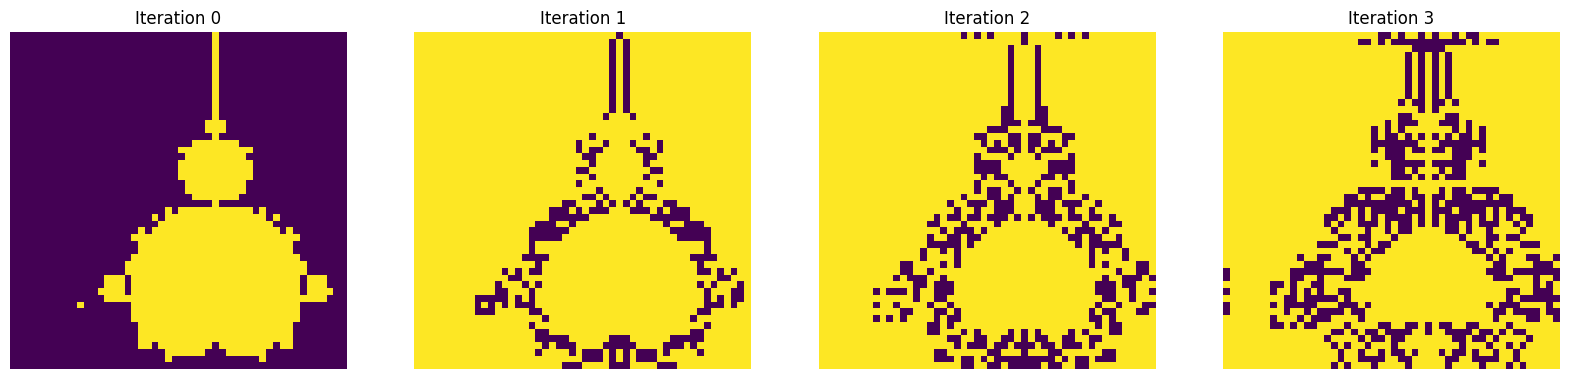

In [4]:
# Quantum Mandelbrot Set GOL
import numpy as np
import matplotlib.pyplot as plt

def is_in_mandelbrot(c, max_iter=100):
    """ Check if a complex number is in the Mandelbrot set. """
    z = 0
    for i in range(max_iter):
        z = z**2 + c
        if abs(z) > 2:
            return False
    return True

class MandelbrotGameOfLife:
    def __init__(self, size=50, scale=0.05, offset=(-2, -1.5)):
        self.size = size
        self.scale = scale
        self.offset = offset
        self.grid = self.initialize_grid()
    
    def initialize_grid(self):
        """ Initialize the grid based on Mandelbrot set membership. """
        grid = np.zeros((self.size, self.size))
        for x in range(self.size):
            for y in range(self.size):
                # Map grid position to complex number
                cx = x * self.scale + self.offset[0]
                cy = y * self.scale + self.offset[1]
                c = complex(cx, cy)

                # Set initial state based on Mandelbrot set membership
                grid[x, y] = 1 if is_in_mandelbrot(c) else -1
        return grid

class QuantumMandelbrotGameOfLife(MandelbrotGameOfLife):
    def update_cell(self, x, y):
        """ Update a cell based on the product of its neighbors. """
        product = 1
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue
                product *= self.grid[(x + dx) % self.size, (y + dy) % self.size]
        return -1 if product == -1 else 1

    def update_grid(self):
        """ Update the entire grid based on the quantum rules. """
        new_grid = np.copy(self.grid)
        for x in range(self.size):
            for y in range(self.size):
                new_grid[x, y] = self.update_cell(x, y)
        return new_grid

# Initialize and perform iterations
size = 50  # Smaller size for faster computation and clearer visualization
quantum_game = QuantumMandelbrotGameOfLife(size=size)

# Store initial and subsequent states
states = [np.copy(quantum_game.grid)]
for _ in range(3):
    quantum_game.grid = quantum_game.update_grid()
    states.append(np.copy(quantum_game.grid))

# Visualization
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, state in enumerate(states):
    axs[i].imshow(state, cmap='viridis')
    axs[i].set_title(f"Iteration {i}")
    axs[i].axis('off')
plt.show()
